In [47]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
def read_data (path):
    lines = []
    with open(path) as f:
        for l in f.readlines():
            split = [t.strip().split() for t in l.strip().split(',')]
            item = dict()
            for s in split:
                for kv in s:
                    k, v = s[0][:-1], s[1]
                    if k == 'duration' or k == 'msg_len' or k == 'iteration' or k== 'n_threads':
                        v = int(v)
                    elif k == 'elapsed':
                        v = float(v) if v != 'too_large' else -1
                item[k] = v     
            lines.append(item)
    return lines

normal_data = pd.DataFrame(read_data("./01_normal_results.txt"))
omp_data = pd.DataFrame(read_data("./02_omp_results.txt"))
cuda_data = pd.DataFrame(read_data("./03_cuda_results.txt"))

normal_data['type'] = 'normal'
omp_data['type'] = 'omp'
cuda_data['type'] = 'cuda'

/home/edwmapa/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/edwmapa/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/edwmapa/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/edwmapa/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before

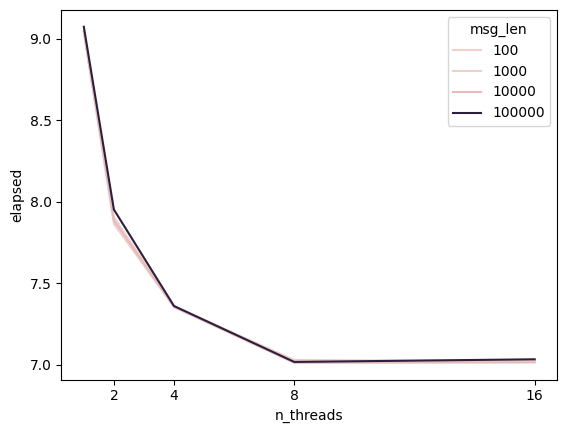

In [96]:
cuda_perf = omp_data[omp_data['elapsed'] != -1].groupby(['duration', 'msg_len', 'n_threads'])['elapsed'].mean().reset_index()
cuda_perf = cuda_perf[(cuda_perf['duration'] == 40)]

fig, ax = plt.subplots()
sns.lineplot(data=cuda_perf, x='n_threads', y='elapsed', hue='msg_len', ax=ax)
ax.set_xticks([2,4,8,16])
#ax.set_xscale('log', base=2)
plt.show()

In [82]:
cuda_perf.dtypes

duration       int64
msg_len        int64
n_threads     object
elapsed      float64
dtype: object